Period of E neuron     19.875 ms


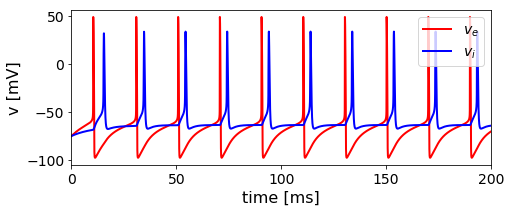

In [4]:
from scipy.integrate import odeint
import numpy as np
import pylab as pl
import lib


i_ext_e = 1.4
i_ext_i = 0.0
g_ei = 0.25
g_ie = 0.25
v_rev_e = 0.0
v_rev_i = -75.0
tau_r_e = 0.5
tau_peak_e = 0.5
tau_d_e = 3.0
tau_r_i = 0.5
tau_peak_i = 0.5
tau_d_i = 9.0
t_final = 200.0
dt = 0.01

# ------------------------------------------------------------------#


if __name__ == "__main__":

    # initial conditions
    v_e = -75.0
    h_e = 0.1
    n_e = 0.1
    q_e = 0
    s_e = 0
    v_i = -75.0
    h_i = 0.1
    n_i = 0.1
    q_i = 0
    s_i = 0
    initialConditions = [v_e, h_e, n_e, q_e, s_e,
                         v_i, h_i, n_i, q_i, s_i]

    t = np.arange(0, t_final, dt)
    sol = odeint(lib.derivative,
                 initialConditions,
                 t)

    v_e = sol[:, 0]
    v_i = sol[:, 5]

    eSpikes = lib.spikeDetection(t, v_e, -20.0)
    period = eSpikes[-1] - eSpikes[-2]
    print ("Period of E neuron %10.3f ms" % period)



    pl.figure(figsize=(7, 3))
    pl.plot(t, v_e, lw=2, c="r", label=r"$v_e$")
    pl.plot(t, v_i, lw=2, c="b", label=r"$v_i$")
    pl.xlim(min(t), max(t))
    # pl.ylim(-100, 50)
    pl.xlabel("time [ms]", fontsize=16)
    pl.ylabel("v [mV]", fontsize=16)
    pl.legend(fontsize=14, loc="upper right")
    pl.xticks(range(0, int(t_final) + 1, 50))
    pl.tight_layout()
    pl.tick_params(labelsize=14)

    pl.savefig("fig_30_3.png")
    pl.show()

# RTM parameters
# c = 1
# g_k = 80
# g_na = 100
# g_l = 0.1
# v_k = -100
# v_na = 50
# v_l = -67

# WB parameters
# c = 1.0
# g_k = 9.0
# g_Na = 35.0
# g_l = 0.1
# v_k = -90.0
# v_na = 55.0
# v_l = -65.0